In [1]:
from numpy.random import seed

class AdalineSGD:
    """ADAptive Linear NEuron classifier.
    
    Parameters
    --------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.
        
    Attributes
    --------------
    w_ : 1d-array
       Weights after fitting.
    errors_ : list
       Number of misclassifications in every epoch.
    shuffle : bool (default : True)
       Shuffles training data every epoch
       if True to prevent cycles.
    random_state : int (default: None)
       Set random state for shuffling
       and initializing the weights.
    
    """
    def __init__(self, eta =0.01, n_iter =10, shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        #self.w_initialized = False
        self.shuffle = shuffle
        #if random_state:
         #   seed(random_state)
        
    def fit(self, X, y):
        """ Fit training data.
        
        Parameters
        --------------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples
          is the number of samples and 
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.
          
        Returns
        -------------
        self : object
        
        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X,y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost)/len(y)
            self.cost_.append(avg_cost)
        return self
    
    def partial_fit(self, X, y):
        """Fit training data without reinitializing the weights"""
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self
    
    def _shuffle(self, X, y):
        """Shuffle training data"""
        r=np.random.permutation(len(y))
        return X[r], y[r]
    
    def _initialize_weights(self, m):
        """Initialize weights to zeros"""
        self.w_ = np.zeros(1+m)
        #self.w_initialized =True
        
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        output = self.net_input(xi)
        error = (target - output)
        self.w_[1:] += self.eta*xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot (X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return self.net_input(X)
    
    def predict (self, X):
        """Return class label after unit step"""
        return np.where (self.activation(X) >= 0.0, 1, -1)

In [2]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
print(df.head())
df.tail()

     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [3]:
import matplotlib.pyplot as plt
import numpy as np
y=df.iloc[0:100, 4].values
y=np.where(y=='Iris-setosa', -1, 1)
X=df.iloc[0:100, [0,2]].values
plt.scatter(X[:50, 0], X[:50,1], color='red', marker='o',label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.show()

<Figure size 640x480 with 1 Axes>

In [4]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    colors1= colors[:len(np.unique(y))]
    #print("colors1 : " + str(colors1))
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    #print("x1_min: "+ str(x1_min))
    #print("x1_max: "+ str(x1_max))
    #print("x2_min: "+ str(x2_min))
    #print("x2_min: "+ str(x2_max))
    
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    #print(xx1.shape)
    #print(xx2.shape)
    #np.savetxt("xx1.csv", np.column_stack(xx1), delimiter=",", fmt='%s')
    #np.savetxt("xx2.csv", np.column_stack(xx2), delimiter=",", fmt='%s')
    Z=classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)  # What .ravel() is doing here ?
    #print(Z.shape)
    Z=Z.reshape(xx1.shape)
    #print(Z.shape)
    #np.savetxt("file_name.csv", np.column_stack(Z), delimiter=",", fmt='%s')
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, c1 in enumerate(np.unique(y)):
        #print(X[y==c1, 0])
        #print(X[y == c1, 1])
        plt.scatter(x=X[y==c1, 0], y=X[y == c1, 1], alpha = 0.8, c=cmap(idx), marker =markers[idx], label = c1)

In [5]:
# Standardisation
X_std=np.copy(X)
X_std[:,0]=(X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1]=(X[:,1] - X[:,1].mean()) / X[:,1].std()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


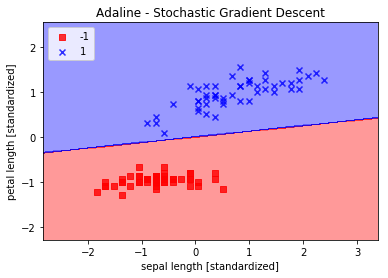

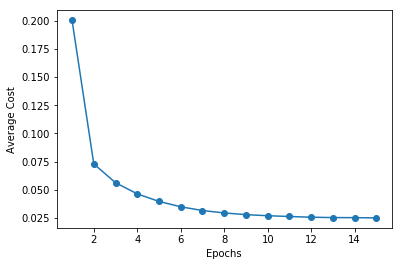

In [6]:
ada = AdalineSGD(n_iter=15, eta = 0.01, random_state=1)
ada.fit(X_std,y)
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Stochastic Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()
plt.plot(range(1, len(ada.cost_)+1), ada.cost_, marker ='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.show()

In [7]:
ada.w_

array([ 6.43226878e-04, -1.34448506e-01,  1.07550988e+00])

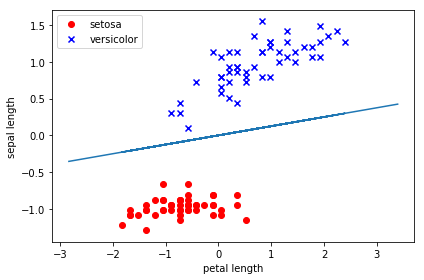

In [8]:
import matplotlib.pyplot as plt
import numpy as np
y=df.iloc[0:100, 4].values
y=np.where(y=='Iris-setosa', -1, 1)
X=df.iloc[0:100, [0,2]].values
plt.scatter(X_std[:50, 0], X_std[:50,1], color='red', marker='o',label='setosa')
plt.scatter(X_std[50:100, 0], X_std[50:100, 1], color='blue', marker='x', label='versicolor')
x1=np.array([min(X_std[:,0])-1]+list(X_std[:,0])+ [max(X_std[:,0])+1])
x2= -(ada.w_[0]/ada.w_[2]) - ((ada.w_[1]/ada.w_[2])*x1)   
plt.plot(x1, x2)
plt.xlabel('petal length')
plt.ylabel('sepal length')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()